In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(68.60180829710154, -89.8761663215173),
 (53.41546698757199, 175.5461906442987),
 (-44.109698625678824, -117.21616504161577),
 (37.114114305540255, 69.28088427648632),
 (85.68222975041681, 86.37809563977885),
 (19.35760815139797, 64.12570186169089),
 (-12.062740627028717, -123.28711264041836),
 (78.37455544021455, 89.57372855936978),
 (32.870417482407575, 0.8548483377041123),
 (-63.70364830174469, -161.75318231843238),
 (85.24120143447138, 164.86665836466693),
 (63.47248602717201, 43.369143662015716),
 (-74.91366762785069, 126.01709367199936),
 (-67.71329806758271, 121.08979413289012),
 (22.018616467034633, 17.85141979296543),
 (17.88461777382635, 92.18727411592192),
 (75.08084368487377, 57.07566473279451),
 (-69.62095199718317, 77.08949071272673),
 (-61.62583861676887, 30.487459384798),
 (-59.111844269155625, 26.925793967503637),
 (-43.09413333691681, -90.96936345254338),
 (21.128625826890897, 82.73422903751691),
 (-55.20918317316773, 43.76966833659097),
 (-31.41229419470269, 147.738

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | farkhor
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | aflu
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | rochegda
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | faya
Processing Record 16 of Set 1 | akyab
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | basna
Processing Record 23 of Set 1 | east london
Processing Record 24

City not found. Skipping...
Processing Record 38 of Set 4 | bud
Processing Record 39 of Set 4 | atar
Processing Record 40 of Set 4 | sooke
Processing Record 41 of Set 4 | northam
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | chara
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | duz
City not found. Skipping...
Processing Record 47 of Set 4 | kupang
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | anori
Processing Record 50 of Set 4 | kampong thum
Processing Record 1 of Set 5 | skjervoy
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | iquique
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | ponta delgada
Processing Record 9 of Set 5 | la macarena
Processing Record 10 of Set 5 | sa

Processing Record 27 of Set 8 | poum
Processing Record 28 of Set 8 | saint-francois
Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | sampit
Processing Record 31 of Set 8 | avera
Processing Record 32 of Set 8 | naron
Processing Record 33 of Set 8 | kincardine
Processing Record 34 of Set 8 | guijalo
Processing Record 35 of Set 8 | barbar
City not found. Skipping...
Processing Record 36 of Set 8 | toftir
City not found. Skipping...
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | boende
Processing Record 40 of Set 8 | san luis
Processing Record 41 of Set 8 | aguimes
Processing Record 42 of Set 8 | grants pass
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | san julian
Processing Record 46 of Set 8 | morondava
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...
Processing Record 48 of Set 8 | bambanglipuro
Processi

Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 21 of Set 12 | buta
Processing Record 22 of Set 12 | zhezkazgan
Processing Record 23 of Set 12 | bridlington
Processing Record 24 of Set 12 | maceio
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | laguna
Processing Record 27 of Set 12 | lannion
Processing Record 28 of Set 12 | mao
Processing Record 29 of Set 12 | salto
Processing Record 30 of Set 12 | katangli
Processing Record 31 of Set 12 | gayny
Processing Record 32 of Set 12 | tazlau
Processing Record 33 of Set 12 | pemangkat
Processing Record 34 of Set 12 | aklavik
Processing Record 35 of Set 12 | vacaria
Processing Record 36 of Set 12 | honningsvag
Processing Record 37 of Set 12 | vakhrushev
Processing Record 38 of Set 12 | kamenka
Processing Record 39 of Set 12 | margate
Processing Record 40 of Set 12 | rujewa
Processing Record 41 of Set 12 | lafiagi
Processing Record 42 of S

In [10]:
#length of weather data successfully retrieved
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,77.00,31,75,5.82,CA,2020-06-25 02:26:06
1,Nikolskoye,59.70,30.79,64.00,67,57,6.71,RU,2020-06-25 02:26:06
2,Rikitea,-23.12,-134.97,70.97,56,93,7.14,PF,2020-06-25 02:26:06
3,Farkhor,37.49,69.40,82.40,41,20,4.47,TJ,2020-06-25 02:26:06
4,Dikson,73.51,80.55,42.91,88,100,11.63,RU,2020-06-25 02:26:06
5,Sur,22.57,59.53,83.79,78,0,7.18,OM,2020-06-25 02:26:06
6,Atuona,-9.80,-139.03,79.34,69,36,13.73,PF,2020-06-25 02:26:06
7,Talnakh,69.49,88.40,59.00,77,68,4.47,RU,2020-06-25 02:26:06
8,Mataura,-46.19,168.86,52.27,69,0,9.31,NZ,2020-06-25 02:26:07
9,Pevek,69.70,170.31,32.88,93,100,4.83,RU,2020-06-25 02:26:07


In [13]:
# Reordering data
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-06-25 02:26:06,55.74,-97.86,77.00,31,75,5.82
1,Nikolskoye,RU,2020-06-25 02:26:06,59.70,30.79,64.00,67,57,6.71
2,Rikitea,PF,2020-06-25 02:26:06,-23.12,-134.97,70.97,56,93,7.14
3,Farkhor,TJ,2020-06-25 02:26:06,37.49,69.40,82.40,41,20,4.47
4,Dikson,RU,2020-06-25 02:26:06,73.51,80.55,42.91,88,100,11.63
5,Sur,OM,2020-06-25 02:26:06,22.57,59.53,83.79,78,0,7.18
6,Atuona,PF,2020-06-25 02:26:06,-9.80,-139.03,79.34,69,36,13.73
7,Talnakh,RU,2020-06-25 02:26:06,69.49,88.40,59.00,77,68,4.47
8,Mataura,NZ,2020-06-25 02:26:07,-46.19,168.86,52.27,69,0,9.31
9,Pevek,RU,2020-06-25 02:26:07,69.70,170.31,32.88,93,100,4.83


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

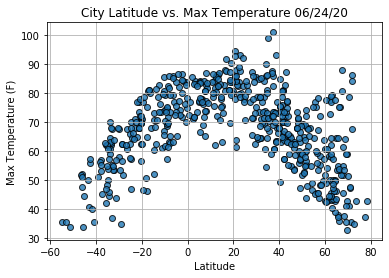

In [19]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

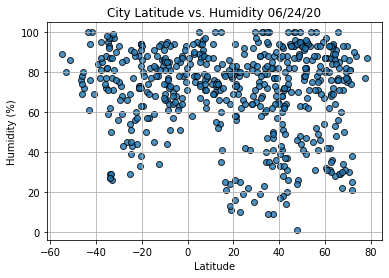

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

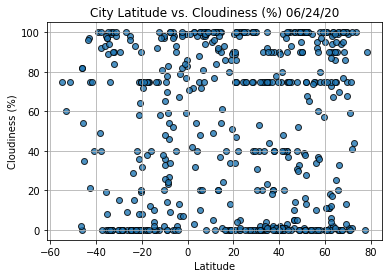

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

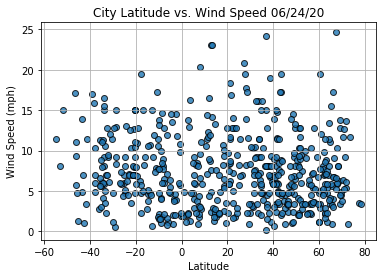

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(f"{title}")
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

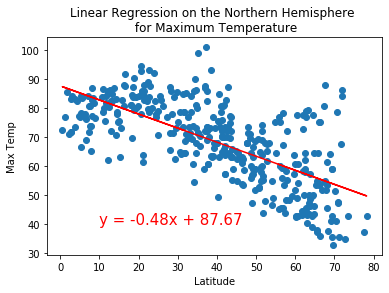

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (10,40))

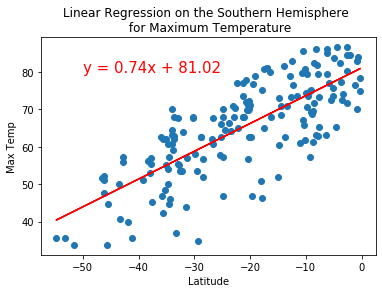

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (-50,80))

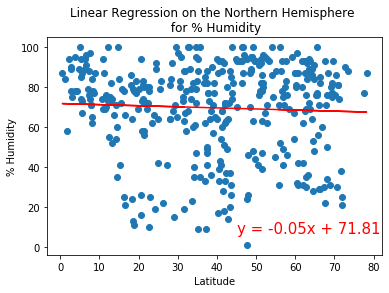

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (45,7))

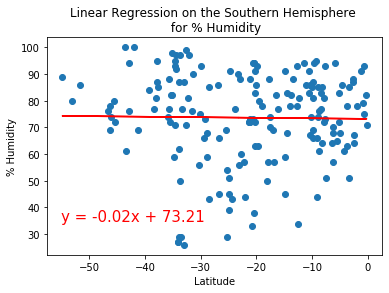

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (-55,35))

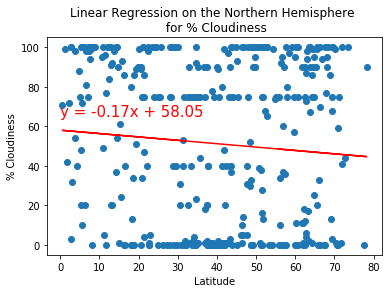

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (0,65))

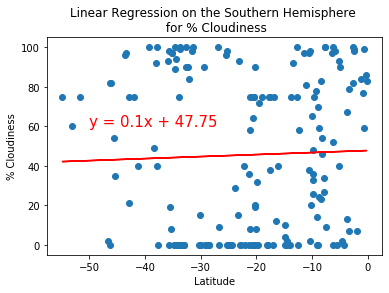

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-50,60))

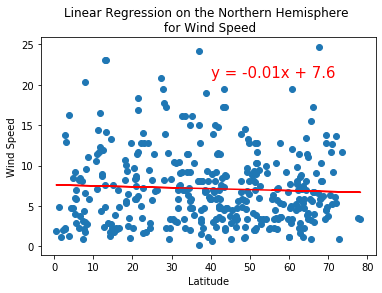

In [134]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (40,21))

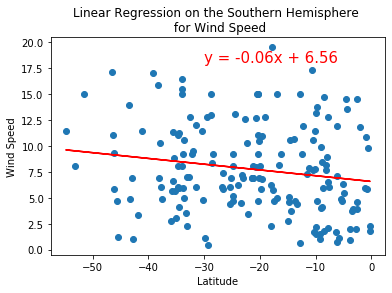

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-30,18))